# Distribution Network Analysis

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade geodatasets

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -U geodatasets


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import geodatasets

C:\Users\User\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\User\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\User\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [140]:
#Load the dataset
Distribution_data = pd.read_csv('ev_distribution_dataset.csv')
Geospatial_data = pd.read_csv('geospatial_dataset.csv')
Weather_data = pd.read_csv('weather_dataset.csv')

In [142]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [144]:
Geospatial_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [146]:
Weather_data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


## Understanding the structure of the datasets

In [149]:
Distribution_data.info()
Distribution_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [151]:
Geospatial_data.info()
Geospatial_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [153]:
Weather_data.info()
Weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


### Exploratory Data Analysis

**This phase will involve Univariate and Bivariate Analysis**

**Univariate Analysis**
1. Visualize the distribution of Electricity Consumption
2. Analyze the distribution of Ev types, charging habits and customer types

**Bivariate Analysis**
1. Use geospatial data to visualize the Locations of substations and Ev charging stations
2. Analyze the capacity of transmission lines

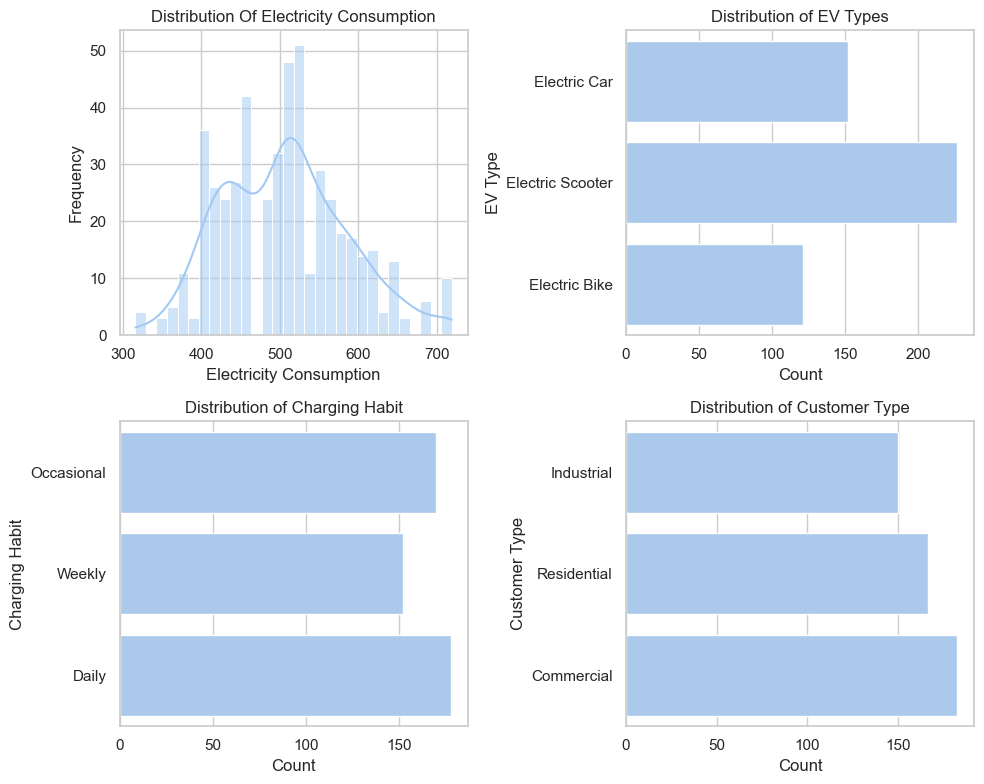

In [156]:
#Set the style and color palette

sns.set(style = 'whitegrid')
sns.set_palette('pastel')

#Create a 2x2 subplot grid to visualize the distributions

fig, axes = plt.subplots(2,2, figsize=(10,8))

#plot distribution of electricity consumption
#Because it is a numerical column, we are going to use 'Histogram' to plot the distribution

sns.histplot(data = Distribution_data, x= 'Electricity_Consumption (kWh)', bins=30, kde=True, ax=axes[0, 0])

axes[0, 0].set_title("Distribution Of Electricity Consumption")
axes[0, 0].set_xlabel("Electricity Consumption")
axes[0, 0].set_ylabel("Frequency")

#plot for the distribution of ev_types
#because it is a categorical column, we are going to use the 'count plot' to plot the distribution

sns.countplot(data = Distribution_data, y= "EV_Type", ax=axes[0, 1])
axes[0, 1].set_title("Distribution of EV Types")
axes[0, 1].set_xlabel("Count")
axes[0, 1].set_ylabel("EV Type")

#plot for charging habit

sns.countplot(data = Distribution_data, y= "Charging_Habit", ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Charging Habit")
axes[1, 0].set_xlabel("Count")
axes[1, 0].set_ylabel("Charging Habit")

#Plot for customer types

sns.countplot(data = Distribution_data, y= "Customer_Type", ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Customer Type")
axes[1, 1].set_xlabel("Count")
axes[1, 1].set_ylabel("Customer Type")

plt.tight_layout()

plt.show()




In [158]:
#Visualize the substations and Ev substation on the map
# But we need to extract the lat and long from the dataset into different columns and turn them to geoframes so that they can be plotted on a map

# To proceed with the geospatial analysis, let's:
# Extract the latitude and longitude from the location columns (Substation_Location and EV_Charging_Station_Location) in the datasets.
# Plot the locations of the substations and EV charging stations on a map.

# Extract latitude and longitude for EV charging stations
Distribution_data['ev_latitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
    lambda x: float(x.split(",")[0].replace("(", "").strip()))
Distribution_data['ev_longitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
    lambda x: float(x.split(",")[1].replace(")", "").strip()))

# Extract latitude and longitude for substations
Geospatial_data['substation_latitude'] = Geospatial_data['Substation_Location'].apply(
    lambda x: float(x.split(",")[0].replace("(", "").strip()))
Geospatial_data['substation_longitude'] = Geospatial_data['Substation_Location'].apply(
    lambda x: float(x.split(",")[1].replace(")", "").strip()))

# Drop the original location columns to clean up the dataframe
Distribution_data = Distribution_data.drop(columns=['EV_Charging_Station_Location'])
Geospatial_data = Geospatial_data.drop(columns=['Substation_Location'])


In [160]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [162]:
Geospatial_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


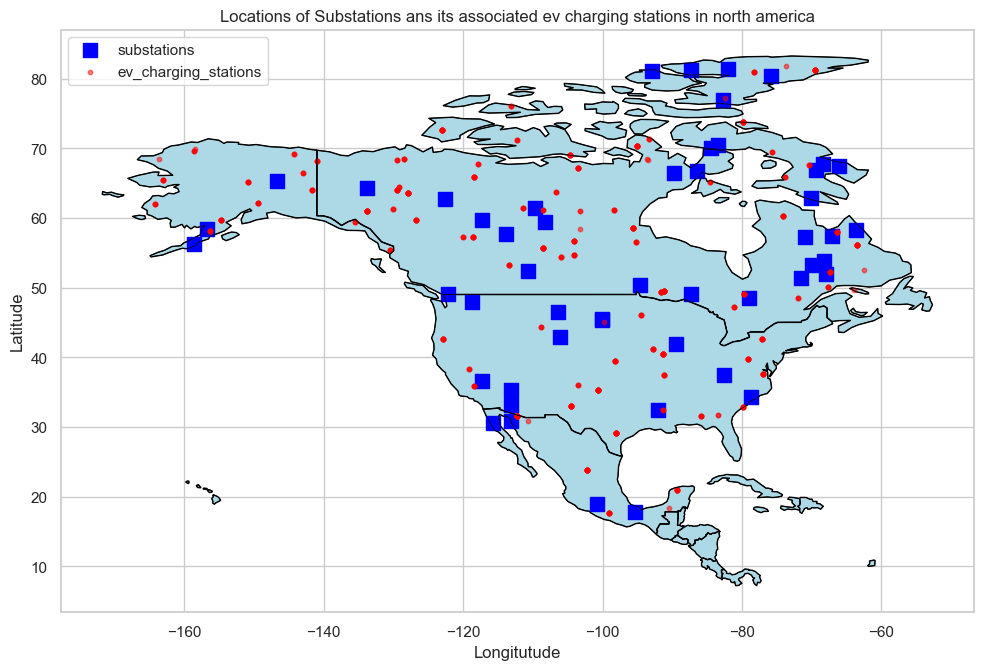

In [164]:
#convert dataframes into geodataframe, so that it can be plotted in the map

ev_gdf = gpd.GeoDataFrame(Distribution_data, 
                          geometry = gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_data, 
                          geometry = gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude))

#Load the world data

world = gpd.read_file("ne_110m_admin_0_countries.zip")


#Filter to north amaerica since our locations are contered on north amaerica

north_america_countries = [
    "United States of America", "Canada", "Mexico",
    "Bahamas", "Cuba", "Haiti", "Dominican Republic",
    "Jamaica", "Guatemala", "Honduras", "El Salvador",
    "Nicaragua", "Costa Rica", "Panama", "Belize",
    "Barbados", "Trinidad and Tobago", "Saint Lucia",
    "Saint Kitts and Nevis", "Antigua and Barbuda",
    "Saint Vincent and the Grenadines", "Grenada"
]

north_america = world[world["ADMIN"].isin(north_america_countries)]

#Plot the map for north america

fig, ax = plt.subplots(figsize = (10, 8))
north_america.boundary.plot(ax=ax, linewidth = 0.5, color = "black")
north_america.plot(ax=ax, color = "lightblue", edgecolor = "black")

#plotting the substations on the map

substation_gdf.plot(ax=ax, marker = "s", markersize = 100, color = "blue", label = "substations")

ev_gdf.plot(ax=ax, markersize= 10, color ="red", label ="ev_charging_stations", alpha = 0.5)

plt.title("Locations of Substations ans its associated ev charging stations in north america")
plt.xlabel("Longitutude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

In [165]:
from shapely.geometry import LineString

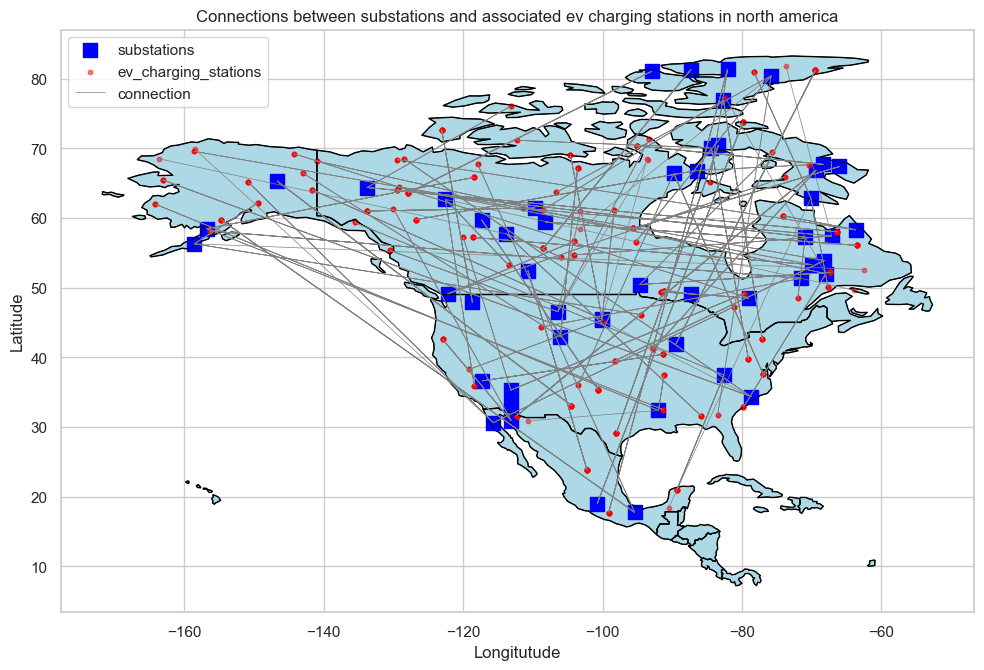

In [168]:
ev_gdf = gpd.GeoDataFrame(Distribution_data, 
                          geometry = gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_data, 
                          geometry = gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude))

#Create lines connecting each substation to its associated ev charging stations

lines = []

for _, ev_row in Distribution_data.iterrows():
    substation = Geospatial_data[Geospatial_data["Substation_ID"] == ev_row["Substation_ID"]].iloc[0]
    line = [(ev_row["ev_longitude"], ev_row["ev_latitude"]),
            (substation["substation_longitude"], substation["substation_latitude"])]
    lines.append(line)

line_gdf = gpd.GeoDataFrame(geometry = [LineString(line) for line in lines ])

world = gpd.read_file("ne_110m_admin_0_countries.zip")


#Filter to north amaerica since our locations are contered on north amaerica

north_america_countries = [
    "United States of America", "Canada", "Mexico",
    "Bahamas", "Cuba", "Haiti", "Dominican Republic",
    "Jamaica", "Guatemala", "Honduras", "El Salvador",
    "Nicaragua", "Costa Rica", "Panama", "Belize",
    "Barbados", "Trinidad and Tobago", "Saint Lucia",
    "Saint Kitts and Nevis", "Antigua and Barbuda",
    "Saint Vincent and the Grenadines", "Grenada"
]

north_america = world[world["ADMIN"].isin(north_america_countries)]

#Plot the map for north america

fig, ax = plt.subplots(figsize = (10, 8))
north_america.boundary.plot(ax=ax, linewidth = 0.5, color = "black")
north_america.plot(ax=ax, color = "lightblue", edgecolor = "black")

#plotting the substations on the map

substation_gdf.plot(ax=ax, marker = "s", markersize = 100, color = "blue", label = "substations")
ev_gdf.plot(ax=ax, markersize= 10, color ="red", label ="ev_charging_stations", alpha = 0.5)
#Plotting line
line_gdf.plot (ax =ax, linewidth = 0.5, color ='gray', label = 'connection')
plt.title("Connections between substations and associated ev charging stations in north america")
plt.xlabel("Longitutude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()


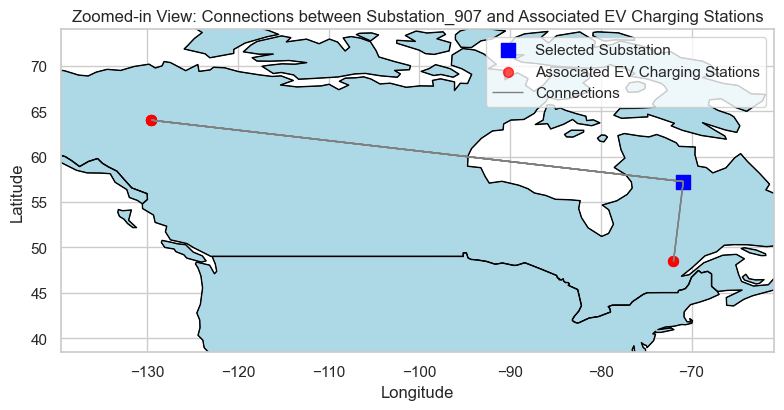

In [169]:
#Let's zoom in and see the connection of Substation 1 to EV charging station
from shapely.geometry import LineString

# Filtering for the first substation and its associated EV charging stations
selected_substation = Geospatial_data.iloc[0]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert the dataframes to GeoDataFrames using the provided latitude and longitude columns
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), geometry=gpd.points_from_xy([selected_substation.substation_longitude], [selected_substation.substation_latitude]))

# Create lines connecting the selected substation to its associated EV charging stations
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['substation_longitude'], selected_substation['substation_latitude']) for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

world = gpd.read_file("ne_110m_admin_0_countries.zip")


#Filter to north amaerica since our locations are contered on north amaerica

north_america_countries = [
    "United States of America", "Canada", "Mexico",
    "Bahamas", "Cuba", "Haiti", "Dominican Republic",
    "Jamaica", "Guatemala", "Honduras", "El Salvador",
    "Nicaragua", "Costa Rica", "Panama", "Belize",
    "Barbados", "Trinidad and Tobago", "Saint Lucia",
    "Saint Kitts and Nevis", "Antigua and Barbuda",
    "Saint Vincent and the Grenadines", "Grenada"
]

north_america = world[world["ADMIN"].isin(north_america_countries)]

#Determining the bounding box for the zoomed in area

buffer = 10 #degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting with zoom
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Selected Substation')
ev_gdf_selected.plot(ax=ax, markersize=50, color='red', label='Associated EV Charging Stations', alpha=0.7)
line_gdf_selected.plot(ax=ax, linewidth=1, color='gray', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title(f'Zoomed-in View: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()
                    
                                                  
                    


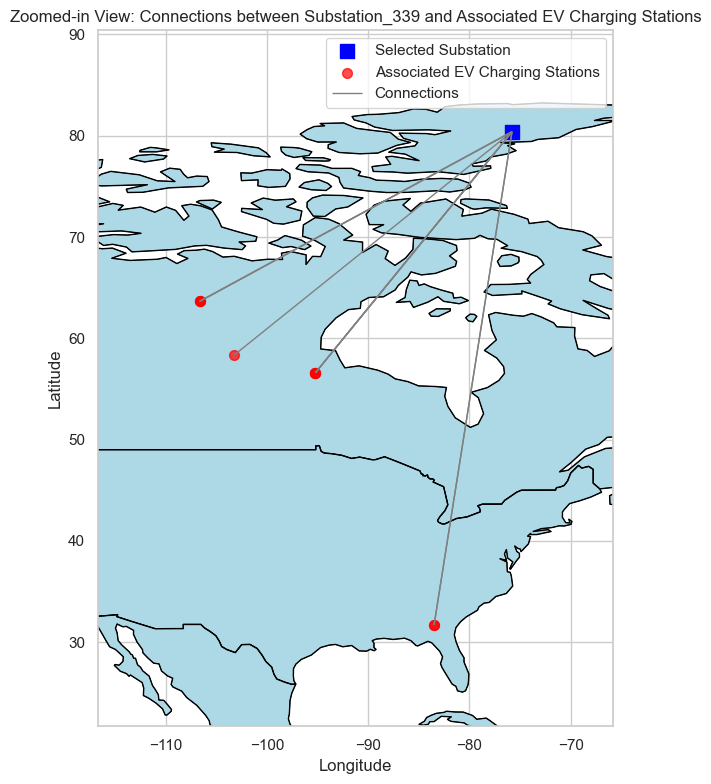

In [171]:
#Let's zoom in and see the connection of Substation 1 to EV charging station
from shapely.geometry import LineString

# Filtering for the first substation and its associated EV charging stations
selected_substation = Geospatial_data.iloc[2]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert the dataframes to GeoDataFrames using the provided latitude and longitude columns
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), geometry=gpd.points_from_xy([selected_substation.substation_longitude], [selected_substation.substation_latitude]))

# Create lines connecting the selected substation to its associated EV charging stations
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['substation_longitude'], selected_substation['substation_latitude']) for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

world = gpd.read_file("ne_110m_admin_0_countries.zip")


#Filter to north amaerica since our locations are contered on north amaerica

north_america_countries = [
    "United States of America", "Canada", "Mexico",
    "Bahamas", "Cuba", "Haiti", "Dominican Republic",
    "Jamaica", "Guatemala", "Honduras", "El Salvador",
    "Nicaragua", "Costa Rica", "Panama", "Belize",
    "Barbados", "Trinidad and Tobago", "Saint Lucia",
    "Saint Kitts and Nevis", "Antigua and Barbuda",
    "Saint Vincent and the Grenadines", "Grenada"
]

north_america = world[world["ADMIN"].isin(north_america_countries)]

#Determining the bounding box for the zoomed in area

buffer = 10 #degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting with zoom
fig, ax = plt.subplots(figsize=(10, 8))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Selected Substation')
ev_gdf_selected.plot(ax=ax, markersize=50, color='red', label='Associated EV Charging Stations', alpha=0.7)
line_gdf_selected.plot(ax=ax, linewidth=1, color='gray', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title(f'Zoomed-in View: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()
                    
                                                  
                    


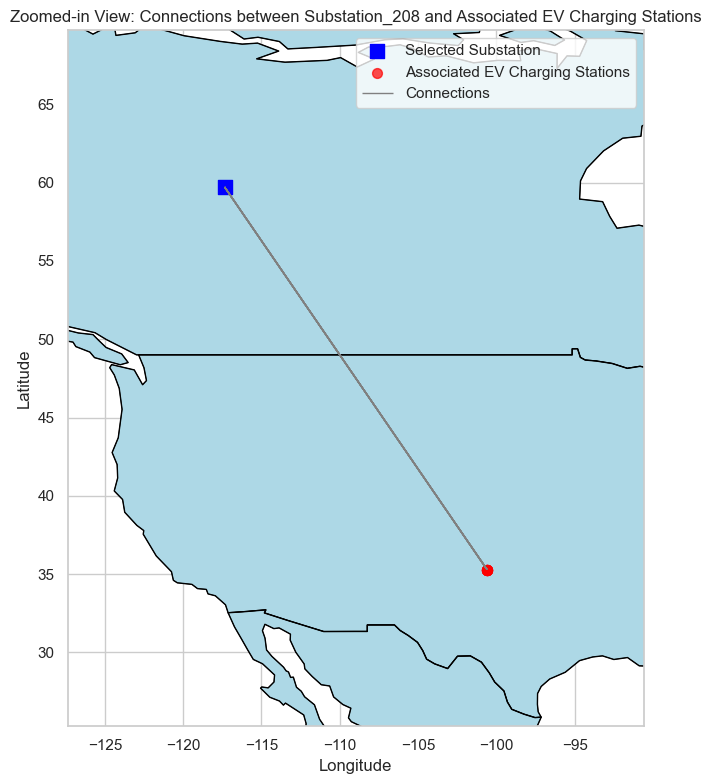

In [172]:
#Let's zoom in and see the connection of Substation 1 to EV charging station
from shapely.geometry import LineString

# Filtering for the first substation and its associated EV charging stations
selected_substation = Geospatial_data.iloc[47]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert the dataframes to GeoDataFrames using the provided latitude and longitude columns
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), geometry=gpd.points_from_xy([selected_substation.substation_longitude], [selected_substation.substation_latitude]))

# Create lines connecting the selected substation to its associated EV charging stations
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['substation_longitude'], selected_substation['substation_latitude']) for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

world = gpd.read_file("ne_110m_admin_0_countries.zip")


#Filter to north amaerica since our locations are contered on north amaerica

north_america_countries = [
    "United States of America", "Canada", "Mexico",
    "Bahamas", "Cuba", "Haiti", "Dominican Republic",
    "Jamaica", "Guatemala", "Honduras", "El Salvador",
    "Nicaragua", "Costa Rica", "Panama", "Belize",
    "Barbados", "Trinidad and Tobago", "Saint Lucia",
    "Saint Kitts and Nevis", "Antigua and Barbuda",
    "Saint Vincent and the Grenadines", "Grenada"
]

north_america = world[world["ADMIN"].isin(north_america_countries)]

#Determining the bounding box for the zoomed in area

buffer = 10 #degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting with zoom
fig, ax = plt.subplots(figsize=(10, 8))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Selected Substation')
ev_gdf_selected.plot(ax=ax, markersize=50, color='red', label='Associated EV Charging Stations', alpha=0.7)
line_gdf_selected.plot(ax=ax, linewidth=1, color='gray', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title(f'Zoomed-in View: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()
                    
                                                  
                    


### Distribution of EV types across north america


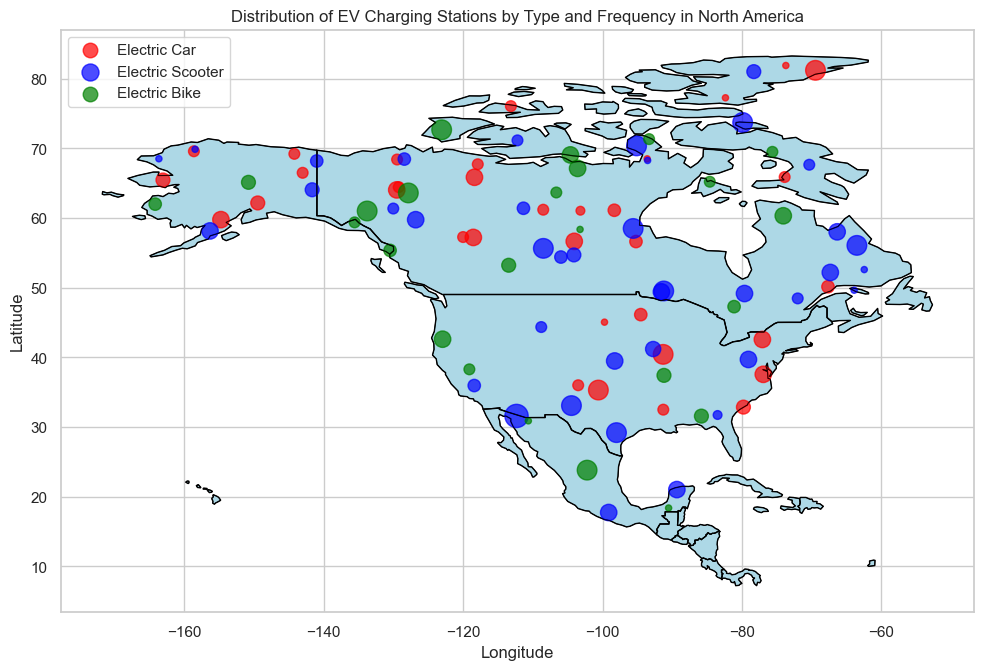

In [177]:
#Group the data by location and ev types , then count the numbers of stations

grouped_data = Distribution_data.groupby(['ev_latitude', 'ev_longitude','EV_Type']).size().reset_index(name = 'count')

#convert to geodataframe

grouped_gdf = gpd.GeoDataFrame(grouped_data, 
                               geometry = gpd.points_from_xy(grouped_data.ev_longitude, grouped_data.ev_latitude))

#load map data

world = gpd.read_file("ne_110m_admin_0_countries.zip")


#Filter to north amaerica since our locations are contered on north amaerica

north_america_countries = [
    "United States of America", "Canada", "Mexico",
    "Bahamas", "Cuba", "Haiti", "Dominican Republic",
    "Jamaica", "Guatemala", "Honduras", "El Salvador",
    "Nicaragua", "Costa Rica", "Panama", "Belize",
    "Barbados", "Trinidad and Tobago", "Saint Lucia",
    "Saint Kitts and Nevis", "Antigua and Barbuda",
    "Saint Vincent and the Grenadines", "Grenada"
]

north_america = world[world["ADMIN"].isin(north_america_countries)]


#plotting with zoom
fig, ax = plt.subplots(figsize=(10, 8))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

#Definr the colors of the ev types

colors = {'Electric Car': 'red', 'Electric Scooter' : 'blue', 'Electric Bike':'green'}

# Plot the EV charging stations with marker sizes reflecting the count
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    sub_gdf.plot(ax=ax, markersize=sub_gdf['count']*20, color=color, label=ev_type, alpha=0.7)

plt.title('Distribution of EV Charging Stations by Type and Frequency in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()




### NETWORK CAPACITY ASSESSMENT

To perform network capacity assessment:

1. Calculate the total electricity consumption for each substation.

2. Compare the total electricity consumption with the transmission line capacity.

In [180]:
# group ev distribution data by substation ID and calculate the total electricity consumption for each substation

total_consumption_per_substation = Distribution_data.groupby("Substation_ID")["Electricity_Consumption (kWh)"].sum().reset_index()

#merge the total consumption data to the geospatial data(it has the transmission line capacity of each substation) so that we can calculate the ratio of electricity comsumption to the capacity of the substation.

network_capacity_data = pd.merge(Geospatial_data, total_consumption_per_substation, on = "Substation_ID")

# Let us now rename the column, for proper identification

network_capacity_data.rename(columns = { "Electricity_Consumption (kWh)" : "Total_Consumption (kWh)"}, inplace = True)

#Let's now calculate the ratio of electricity consumption to transmission line capacity
#conversion 1MW = 1000kWh

network_capacity_data["Consumption_to_Capacity_ratio"] = network_capacity_data["Total_Consumption (kWh)"] / (network_capacity_data["Transmission_Line_Capacity (MW)"] * 1000)

In [182]:
network_capacity_data

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546
5,Substation_752,33,81.295968,-87.304226,5935.678393,0.179869
6,Substation_294,35,52.421521,-110.699042,4010.395180,0.114583
7,Substation_301,20,30.873564,-113.079468,4738.530994,0.236927
8,Substation_443,60,62.832107,-70.090111,5673.039047,0.094551
9,Substation_996,65,81.330310,-82.055755,4941.446087,0.076022


In [184]:
from shapely.geometry import Point

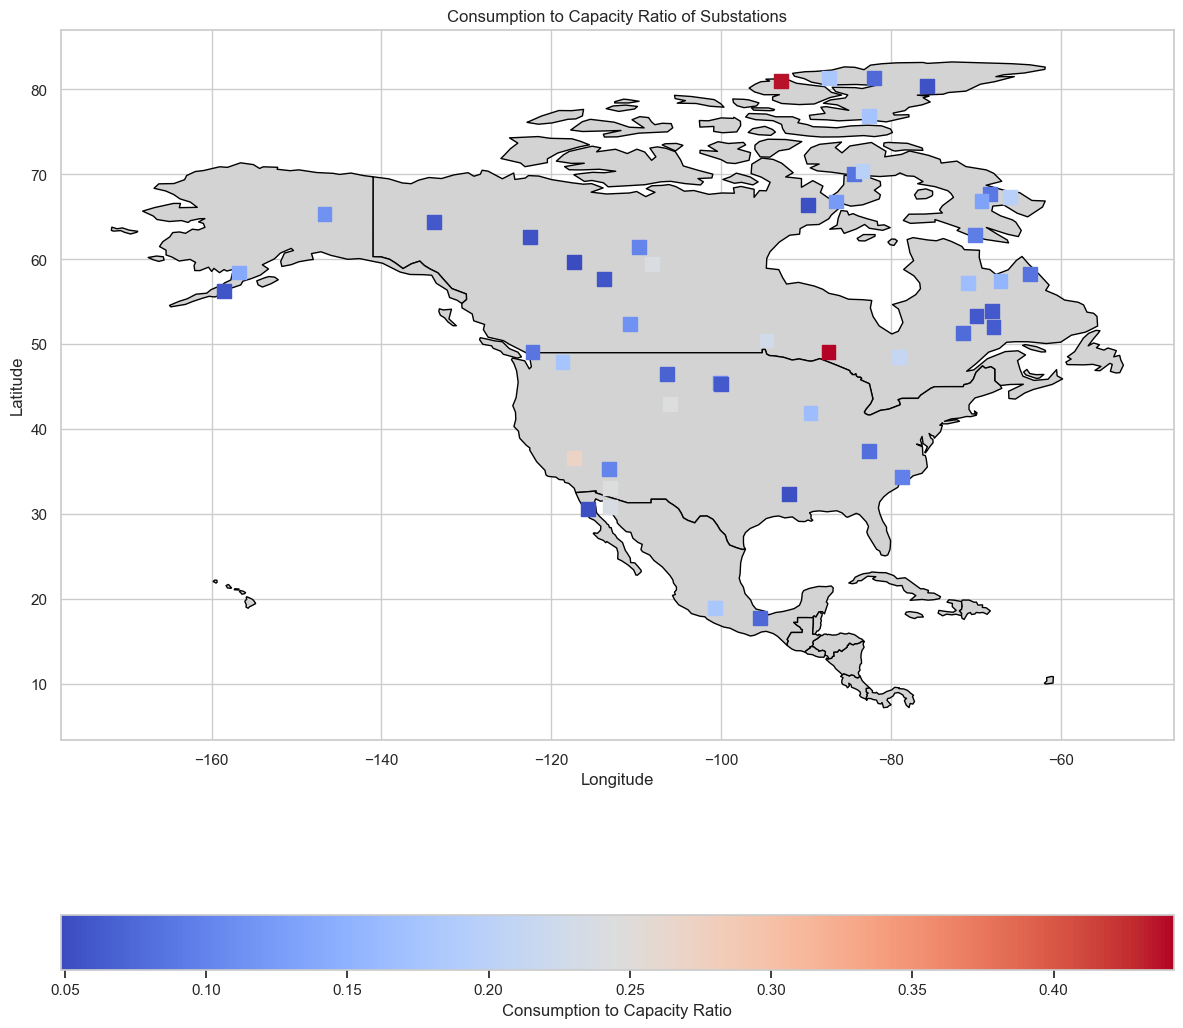

In [188]:
# Recreate the GeoDataFrame for network capacity data with updated geometries
geometry_network_capacity = [Point(lon, lat) for lon, lat in zip(network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])]
gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity)

# Re-plotting the map with Consumption to Capacity Ratio using a choropleth-style visualization
fig, ax = plt.subplots(figsize=(12, 12))
north_america.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_network_capacity.plot(column='Consumption_to_Capacity_ratio', cmap='coolwarm', legend=True,
                         marker='s', markersize=100, ax=ax, legend_kwds={'label': "Consumption to Capacity Ratio", 'orientation': "horizontal"})

ax.set_title("Consumption to Capacity Ratio of Substations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

In [190]:
# Let also investigate if the number of the EVs that comes to the ev stations of a substation also has any correlation with the overload.
# Grouping the EV distribution data by Substation_ID and calculating total electricity consumption for each substation
total_consumption_per_substation = Distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

# Group by Substation_ID and sum the number of EVs
ev_counts = Distribution_data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

# Merge the total consumption data with the geospatial data to compute the Consumption_to_Capacity_Ratio
network_capacity_data = pd.merge(Geospatial_data, total_consumption_per_substation, on='Substation_ID')
network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total_Consumption (kWh)'}, inplace=True)
network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total_Consumption (kWh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)

# Merge with the EV counts data
final_data = pd.merge(ev_counts, network_capacity_data, on='Substation_ID')

# Compute the correlation
correlation_ratio = final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])

correlation_ratio

-0.10944923035990646

In [192]:
final_data.head(5)

,Substation_ID,Number_of_EVs,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_11,130,80,66.836433,-69.356358,10534.827701,0.131685
1,Substation_11,130,43,33.082269,-113.118931,10534.827701,0.244996
2,Substation_133,20,75,45.358755,-100.019561,4579.522617,0.061060
3,Substation_139,70,46,61.412230,-109.685320,4606.661188,0.100145
4,Substation_152,65,61,51.317617,-71.509617,4673.147282,0.076609


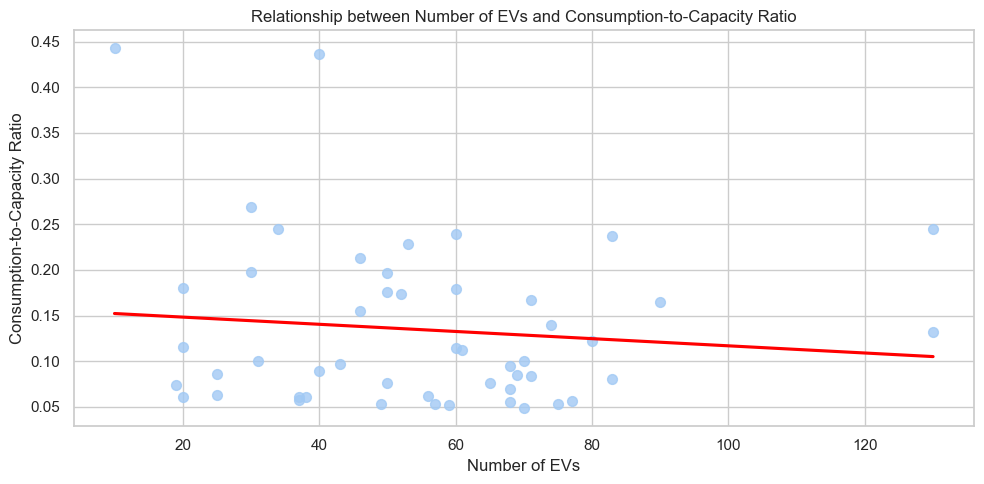

In [194]:
# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x='Number_of_EVs', y='Consumption_to_Capacity_Ratio', data=final_data, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None)
plt.title('Relationship between Number of EVs and Consumption-to-Capacity Ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption-to-Capacity Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

##### OBSERVATIONS:

The map above visualizes the Consumption_to_Capacity_Ratio for each substation, with the color scale representing the ratio.

 -- Substations in red have a higher Consumption_to_Capacity_Ratio, indicating potential overloads in the network.

 -- Substations in blue have a lower ratio, indicating that the network capacity is sufficient for the current load.

 -- The correlation between number of EVs to the overlaod is weak, so it can't be quantified as one of teh reasons for the overload in certain areas.

### Identifying Bottlenecks

#### By analyzing the map, we can identify the substations and areas that are potential bottlenecks in the distribution network. These are the areas where the Consumption_to_Capacity_Ratio is high.

In [198]:
#To clearly identify these bottlenecks, let's filter out the substations with a Consumption_to_Capacity_Ratio close to or greater than 1.
#These are the substations where immediate attention and investment may be necessary to prevent overloads and ensure the reliable delivery of electricity.
# Filtering substations with a Consumption_to_Capacity_Ratio close to or greater than 1
bottleneck_substations = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio'] >= 0.9]

# Displaying the bottleneck substations with relevant information
bottleneck_substations[['Substation_ID', 'Consumption_to_Capacity_Ratio', 'Total_Consumption (kWh)', 'Transmission_Line_Capacity (MW)']]



,Substation_ID,Consumption_to_Capacity_Ratio,Total_Consumption (kWh),Transmission_Line_Capacity (MW)


#### From the dataframe above , we can see there is no Consumption_to_Capacity_Ratio that is close to or greater than 1, so therefore it means there is no immeidate and critical bottlenecks.

### Optimizing Network Upgrades:

For optimizing network upgrades, focus on substations with a high Consumption_to_Capacity_Ratio. Upgrading the transmission lines or adding additional capacity in these areas can help in managing the increased load effectively and ensuring grid reliability.

Additionally, consider factors like;

-- Geographical distribution of EV charging stations because it seems like the EV charging stations are quite far from the Substaions and their load demand.

-- Potential future growth in EV adoption in different areas.

-- Costs associated with different upgrade options.

In [203]:
# The identification of top 5 substations with the highest Consumption_to_Capacity_Ratio
top_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')[['Substation_ID', 'Consumption_to_Capacity_Ratio', 'Total_Consumption (kWh)', 'Transmission_Line_Capacity (MW)']]

top_substations

,Substation_ID,Consumption_to_Capacity_Ratio,Total_Consumption (kWh),Transmission_Line_Capacity (MW)
3,Substation_773,0.442634,4426.337993,10
14,Substation_87,0.436983,5243.800714,12
26,Substation_711,0.269374,4579.354677,17
46,Substation_11,0.244996,10534.827701,43
41,Substation_258,0.244464,5378.214378,22


### Correlation with Weather Data
#### Analyzing the correlation between weather data and electricity consumption or network issues can provide insights into how weather conditions affect the distribution network.

In [208]:
# Merging the weather data with the EV distribution data based on Timestamp and Substation_ID
merged_data = pd.merge(Distribution_data, Weather_data, on=['Timestamp', 'Substation_ID'])

# Calculating the correlation between weather conditions and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

# Displaying the correlation matrix
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


##### OBSERVATIONS:

The correlation matrix above shows the correlation coefficients between electricity consumption, temperature, and precipitation:
  
   -- The correlation between Electricity_Consumption (kWh) and Temperature (°C) is approximately 0.13.

   -- The correlation between Electricity_Consumption (kWh) and Precipitation (mm) is approximately 0.085.

These values suggest that there is a very weak correlation between electricity consumption and both temperature and precipitation in this dataset.

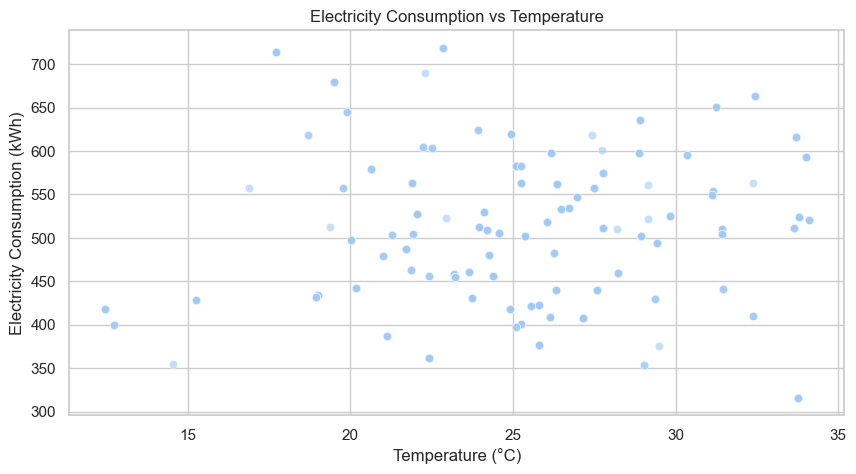

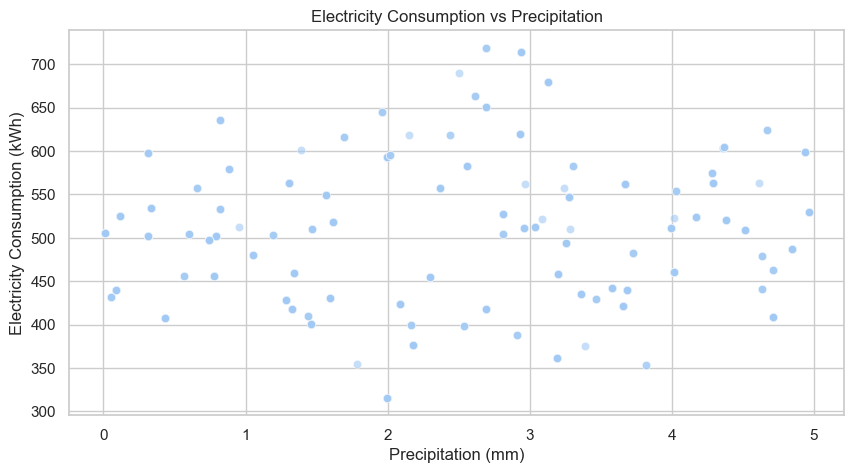

In [212]:
# Plotting scatter plots to visualize the relationship to have a better understanding

# Electricity Consumption vs Temperature
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x="Temperature (°C)", y="Electricity_Consumption (kWh)", alpha=0.6)
plt.title("Electricity Consumption vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Electricity Consumption (kWh)")
plt.show()

# Electricity Consumption vs Precipitation
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x="Precipitation (mm)", y="Electricity_Consumption (kWh)", alpha=0.6)
plt.title("Electricity Consumption vs Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Electricity Consumption (kWh)")
plt.show()

##### OBSERVATIONS
From the plots, we can make the following observations:

Electricity Consumption vs Temperature:
There is no clear trend indicating a relationship between electricity consumption and temperature. The points are scattered broadly across the plot.

Electricity Consumption vs Precipitation:
Similarly, there is no clear trend indicating a relationship between electricity consumption and precipitation. The points are broadly distributed.


In conclusion, based on the current dataset, weather conditions such as temperature and precipitation have a very weak correlation with electricity consumption. This suggests that other factors might be more influential in affecting electricity consumption in the distribution network.
However, it's still important to consider weather data for network analysis as extreme weather conditions can have an impact on the distribution network and its components, potentially leading to outages and other issues.

###  Insights

 1.  Electricity Consumption: The electricity consumption is mostly centered around 500 kWh, with certain instances of higher consumption. This indicates varied demand at different times and locations.


 2. EV Types and Charging Habits: Electric scooters is the most common types of EVs. Most customers charge their EVs daily, indicating a consistent daily load on the distribution network.


 3. Consumer Type: Most Customers are commerical consumers.


 4. Geospatial Distribution: The spatial distribution of substations and EV charging stations is widespread.


 5.  Geospatial Distribution: The Ev charging station seems to be too far from it's corresponding Substation.


 6. Network Capacity: Some substations have a high Consumption_to_Capacity_Ratio, indicating potential bottlenecks and overloads in the network. There is also no correlation with the number of EVs per substation and the Consumption to Capcity Ratio, this shows that Number of EVs is not a factor for overload.


 7. Weather Correlation: The correlation between weather conditions (temperature and precipitation) and electricity consumption is weak in the current dataset, suggesting that other factors might be more influential in affecting electricity consumption.

### The Optimization Strategy/Recommendation

#### This is based on the analysis done and the business problems at hand, all these should be incorporated into the business.

1. **Prioritize Substation Upgrades:**
    Prioritize upgrades at substations where the `Consumption_to_Capacity_Ratio` is high, indicating potential overloads. Upgrade the transmission lines because the subsataions are too far from their corresponding Substations.


2. **Geospatial Analysis for Upgrade Planning:**
    Use geospatial analysis to determine the optimal locations for new substations or upgrades to existing ones. Consider factors like the proximity to high load demand areas (areas with high consumption to capcity ratio) and geographical constraints.


3. **Demand Side Management:**
   Implement demand-side management strategies to balance the load on the grid. Encourage customers to charge their EVs during off-peak hours through incentives or dynamic pricing.


4. **Advanced Monitoring and Analytics:**
   Deploy advanced monitoring systems to continuously monitor the health and performance of the distribution network. Use analytics to predict potential issues and take preventive action.


5. **Cost-Benefit Analysis:**
   Conduct a comprehensive cost-benefit analysis for different upgrade options. Consider factors like the cost of upgrades, operational costs, potential revenue from increased capacity, and the impact on service reliability and customer satisfaction.


6. **Customer Engagement:**
   Engage with customers to understand their needs and expectations. Provide clear communication about network upgrades and how they will enhance service reliability and meet the growing demand for EV charging.


7. **Continuous Improvement:**
  Continuously monitor and assess the performance of the distribution network. Gather feedback from customers and other stakeholders, and use this feedback to make further improvements and optimizations.


By following these steps, PowerCharge Utilities can develop an effective optimization strategy to manage the increased load demand from EV charging stations, ensure the reliability and resilience of the distribution network, and meet the expectations of customers, all while optimizing costs and ensuring regulatory compliance.